# PREDICTION USING UNSUPERVISED ML

# TASK 2

# From the given Iris dataset, predict the optimum number of clusters and present it visually

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
df= pd.read_csv("C:/Users/LENOVO/Downloads/Iris.csv")
print("Data imported successfully")

Data imported successfully


# Perform appropriate Exploratory Data Analysis to understand the data

In [12]:
df.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width
0,0,5.1,3.5,1.4,0.2
1,1,4.9,3.0,1.4,0.2
2,2,4.7,3.2,1.3,0.2
3,3,4.6,3.1,1.5,0.2
4,4,5.0,3.6,1.4,0.2


In [13]:
df.tail()

,Unnamed: 0,sepal length,sepal width,petal length,petal width
145,145,6.7,3.0,5.2,2.3
146,146,6.3,2.5,5.0,1.9
147,147,6.5,3.0,5.2,2.0
148,148,6.2,3.4,5.4,2.3
149,149,5.9,3.0,5.1,1.8


In [15]:
df.isnull().sum()

Unnamed: 0      0
sepal length    0
sepal width     0
petal length    0
petal width     0
dtype: int64

In [17]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,150.0,74.500000,43.445368,0.0,37.25,74.50,111.75,149.0
sepal length,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
sepal width,150.0,3.057333,0.435866,2.0,2.80,3.00,3.30,4.4
petal length,150.0,3.758000,1.765298,1.0,1.60,4.35,5.10,6.9
petal width,150.0,1.199333,0.762238,0.1,0.30,1.30,1.80,2.5


In [18]:
df.shape

(150, 5)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    150 non-null    int64  
 1   sepal length  150 non-null    float64
 2   sepal width   150 non-null    float64
 3   petal length  150 non-null    float64
 4   petal width   150 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [24]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [32]:
x=df.drop(["Unnamed: 0"],axis=1)
x.head()


,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [34]:
x.corr()

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.117570,0.871754,0.817941
sepal width,-0.117570,1.000000,-0.428440,-0.366126
petal length,0.871754,-0.428440,1.000000,0.962865
petal width,0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

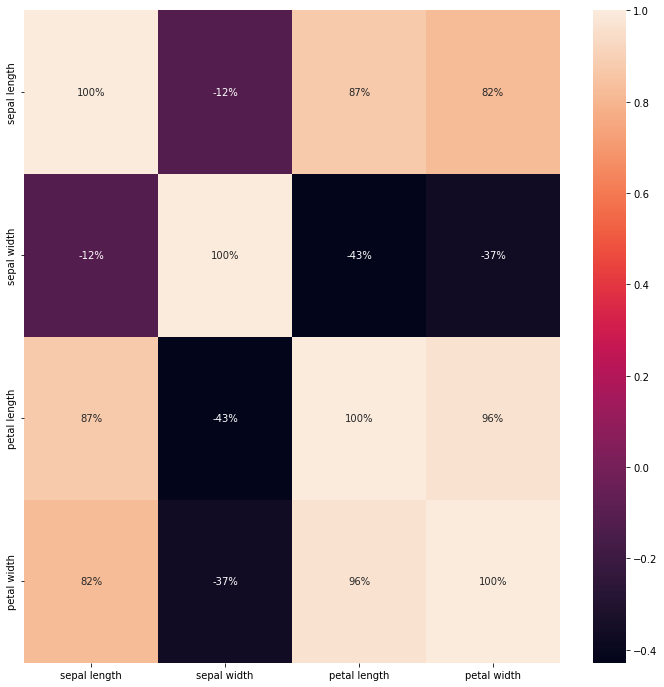

In [35]:
plt.figure(figsize=(12,12))
sns.heatmap(x.corr(),annot=True,fmt='.0%')

# How do you find the optimum number of clusters for K Means? How does one determine the value of K?

WE WOULD BE USING ELBOW METHOD FOR CLUSTERING

In [37]:
from sklearn.cluster import KMeans
wcss=[]

In [38]:
OMP_NUM_THREADS=1
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,random_state=1)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

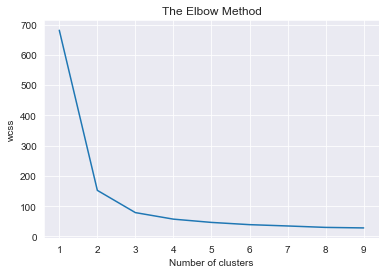

In [39]:
sns.set_style("darkgrid")
plt.plot(range(1,10),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

We can see that the elbow curve starts at K=3 and hence the optimum number of K is 3

In [42]:
model=KMeans(n_clusters=3,random_state=1)
y_predict=model.fit_predict(x)
x=x.values

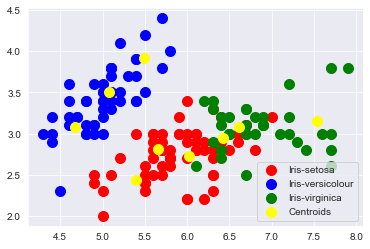

In [45]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_predict == 2, 0], x[y_predict == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

This concludes the K-Means Workshop.